In [31]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

In [32]:
#2016年のイベントデータ
data2016 = pd.read_csv('C:/Users/nukan/Desktop/work/25_Python/MLB_analysis/data/play_by_play_2016.csv', sep='\t')
print(data2016.shape)
data2016.head(30)

(190715, 35)


,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct
0,20160403,KCA201604030,KCA,NYN,1,0,0,2,2,1,CCBBFX,8/L,0,0,granc001,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,L,NaN,8,0
1,20160403,KCA201604030,KCA,NYN,1,0,1,2,2,2,FSBBX,53/G,0,0,wrigd002,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,5,0
2,20160403,KCA201604030,KCA,NYN,1,0,2,1,1,3,BCX,63/G-,0,0,cespy001,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,6,0
3,20160403,KCA201604030,KCA,NYN,1,1,0,0,0,1,X,53/G-,0,0,escoa003,harvm001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,5,0
4,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,2,CBBX,E7/L,0,0,mousm001,harvm001,0,18,T,T,F,F,0,1,NaN,NaN,NaN,0,0,0,0,L,NaN,7,0
5,20160403,KCA201604030,KCA,NYN,1,1,1,1,1,3,BSB,PB.1-2,0,0,cainl001,harvm001,1,10,F,F,F,F,0,0,mousm001,NaN,NaN,2,0,0,0,NaN,NaN,0,0
6,20160403,KCA201604030,KCA,NYN,1,1,1,3,1,3,BSB.BB,W,0,0,cainl001,harvm001,2,14,T,F,F,F,0,1,NaN,mousm001,NaN,0,2,0,0,NaN,NaN,0,0
7,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,4,BBCX,S7/G.2-H(UR);1-3,0,0,hosme001,harvm001,3,20,T,T,F,F,1,1,cainl001,mousm001,NaN,3,5,0,0,G,NaN,7,1
8,20160403,KCA201604030,KCA,NYN,1,1,1,2,0,5,BBX,46(1)3/GDP,0,1,morak001,harvm001,5,2,T,T,F,F,0,0,hosme001,NaN,cainl001,0,0,3,2,G,NaN,4,0
9,20160403,KCA201604030,KCA,NYN,2,0,0,2,2,4,CFBBC,K,0,1,dudal001,volqe001,0,3,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,NaN,NaN,0,0


## カウント別の成績

In [33]:
#ヒットフラグ
data2016.loc[data2016['h_cd'].isin([1, 2, 3, 4]), 'h_fl'] = 1
data2016.loc[data2016['h_cd'].isin([0]), 'h_fl'] = 0
print(data2016.shape)

#バッティングイベントのみ
data2016_bat = data2016[data2016['bat_event_fl']=='T']
print(data2016_bat.shape)



(190715, 36)
(184580, 36)


In [34]:
data2016_bat.groupby('event_cd')['bat_id'].count()

event_cd
2     84556
3     38982
14    14156
15      932
16     1651
17       41
18     1529
19      457
20    27539
21     8254
22      873
23     5610
Name: bat_id, dtype: int64

### カウント別の打率

In [35]:
#カウント別の打率（フォアボール、デッドボールの打席を除く）
data2016_bat['ab_fl'].replace({'T': 1, 'F': 0}, inplace=True)
avg_by_counts = data2016_bat.groupby(['balls_ct', 'strikes_ct'], as_index=False).agg({'ab_fl': 'sum', 'h_fl': 'sum'})
avg_by_counts['avg'] = round(avg_by_counts['h_fl'] / avg_by_counts['ab_fl'], 3)

avg_by_counts

,balls_ct,strikes_ct,ab_fl,h_fl,avg
0,0,0,19174,6637.0,0.346
1,0,1,15823,5097.0,0.322
2,0,2,16524,2485.0,0.150
3,1,0,11936,4246.0,0.356
4,1,1,14962,4999.0,0.334
5,1,2,26911,4456.0,0.166
6,2,0,4410,1548.0,0.351
7,2,1,8949,3054.0,0.341
8,2,2,25848,4627.0,0.179
9,3,0,316,127.0,0.402


In [36]:
avg_by_counts_2d = pd.pivot_table(avg_by_counts, index='balls_ct', columns='strikes_ct', values='avg')
avg_by_counts_2d

strikes_ct,0,1,2
balls_ct,,,
0,0.346,0.322,0.150
1,0.356,0.334,0.166
2,0.351,0.341,0.179
3,0.402,0.368,0.213


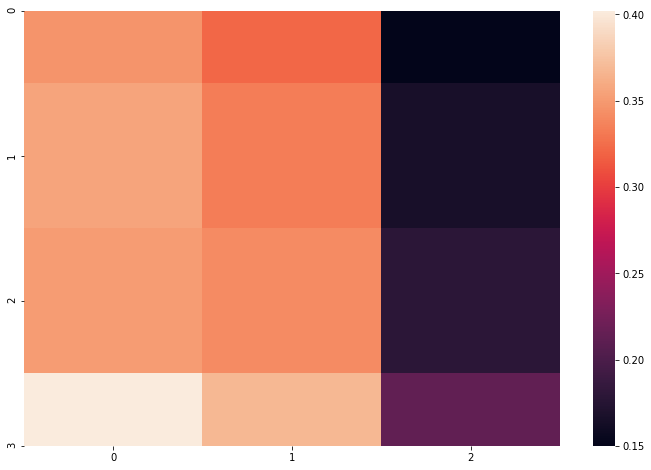

In [37]:
import seaborn as sns
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)


sns.heatmap(avg_by_counts_2d.values, ax=ax)

### カウント詳細の計算

In [38]:
import re

data2016.head()

,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,h_fl
0,20160403,KCA201604030,KCA,NYN,1,0,0,2,2,1,CCBBFX,8/L,0,0,granc001,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,L,NaN,8,0,0.0
1,20160403,KCA201604030,KCA,NYN,1,0,1,2,2,2,FSBBX,53/G,0,0,wrigd002,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,5,0,0.0
2,20160403,KCA201604030,KCA,NYN,1,0,2,1,1,3,BCX,63/G-,0,0,cespy001,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,6,0,0.0
3,20160403,KCA201604030,KCA,NYN,1,1,0,0,0,1,X,53/G-,0,0,escoa003,harvm001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,5,0,0.0
4,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,2,CBBX,E7/L,0,0,mousm001,harvm001,0,18,T,T,F,F,0,1,NaN,NaN,NaN,0,0,0,0,L,NaN,7,0,0.0


In [39]:
s = '[CFKLMOQRST]'
b = '[BIPV]'

In [41]:
## シークエンスがNULLのパターンのとき
print(data2016['pitch_seq_tx'].isnull().sum())
data2016['pitch_seq_tx'].fillna('ZZZ', inplace=True)
print(data2016['pitch_seq_tx'].isnull().sum())


2
0


In [43]:
#けん制など、バッターに対する投球でないものを除く
data2016['pitch_seq_tx'] = data2016['pitch_seq_tx'].apply(lambda x: re.sub('[.>123+*N]', '', x))

In [44]:
#ball 0, strike 0
data2016['c00'] = 'T'

#ball 1, strike 0
data2016['c10'] = data2016['pitch_seq_tx'].apply(lambda x: 'T' if  re.match('^[BIPV]', x) else 'F' )

#ball 2, strike 0
data2016['c20'] = data2016['pitch_seq_tx'].apply(lambda x: 'T' if  re.match('^[BIPV]{2}', x) else 'F' )

#ball 3, strike 0
data2016['c30'] = data2016['pitch_seq_tx'].apply(lambda x: 'T' if  re.match('^[BIPV]{3}', x) else 'F' )

#ball 0, strike 1
data2016['c01'] = data2016['pitch_seq_tx'].apply(lambda x: 'T' if  re.match('^[CFKLMOQRST]', x) else 'F' )

#ball 0, strike 2
data2016['c02'] = data2016['pitch_seq_tx'].apply(lambda x: 'T' if  re.match('^[CFKLMOQRST]{2}', x) else 'F' )

#ball 1, strike 1
data2016['c11'] = data2016['pitch_seq_tx'].apply(lambda x: 'T' if  re.match(
    '^' + b+s + '|' + s+b, x
) else 'F' )

#ball 2, strike 1
data2016['c21'] = data2016['pitch_seq_tx'].apply(lambda x: 'T' if  re.match(
    '^' + b+b+s + '|' + b+s+b + '|' +s+b+b, x
) else 'F' )

#ball 3, strike 1
data2016['c31'] = data2016['pitch_seq_tx'].apply(lambda x: 'T' if  re.match(
    '^' + b+b+b+s + '|' + b+b+s+b + '|' +  b+s+b+b +  '|' + s+b+b+b, x
) else 'F' )

#ball 1, strike 2
data2016['c12'] = data2016['pitch_seq_tx'].apply(lambda x: 'T' if  re.match(
    '^' + b+s+s + '|' + s+b+s + '|' +  s+s+'[FR]*'+b, x
) else 'F' )

#ball 2, strike 2
data2016['c22'] = data2016['pitch_seq_tx'].apply(lambda x: 'T' if  re.match(
    '^' + b+b+s+s + '|' + b+s+b+s + '|' + b+s+s+'[FR]*'+b + '|' + s+b+b+s + '|' + s+b+s+'[FR]*'+b + '|' + s+s+'[FR]*'+b+'[FR]*'+b   , x
) else 'F' )

#ball 3, strike 2
data2016['c32'] = data2016['pitch_seq_tx'].apply(lambda x: 'T' if  re.match(
    '^' + b+b+b+s+s + '|' + b+b+s+b+s + '|' + b+b+s+s+'[FR]*'+b + '|' + b+s+b+b+s + '|' + b+s+b+s+'[FR]*'+b + '|'
     + b+s+s+'[FR]*'+b+b + '|' + s+b+b+b+s + '|' + s+b+b+s+'[FR]*'+b + '|' + s+b+s+'[FR]*'+b+b + '|' + s+s+'[FR]*'+b+b+b
    , x
) else 'F' )

data2016.tail(100)

,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,h_fl,c00,c10,c20,c30,c01,c02,c11,c21,c31,c12,c22,c32
190615,20161002,TEX201610020,TEX,TBA,10,0,0,0,0,6,X,D9/L.1-3,4,4,ramia003,schet001,1,21,T,T,F,F,2,2,shafr001,NaN,NaN,3,0,0,0,L,NaN,9,0,1.0,T,F,F,F,F,F,F,F,F,F,F,F
190616,20161002,TEX201610020,TEX,TBA,10,0,0,2,0,7,BBX,D7/G.3-H,5,4,casac001,schet001,4,21,T,T,F,F,2,2,NaN,NaN,ramia003,0,0,4,0,G,NaN,7,1,1.0,T,T,T,F,F,F,F,F,F,F,F,F
190617,20161002,TEX201610020,TEX,TBA,10,0,0,1,0,7,BB,WP.3-H(NR);2-3,4,4,casac001,schet001,6,9,F,F,F,F,0,0,NaN,ramia003,shafr001,0,3,4,0,NaN,NaN,0,0,0.0,T,T,T,F,F,F,F,F,F,F,F,F
190618,20161002,TEX201610020,TEX,TBA,10,0,0,2,2,8,CBFBS,K,6,4,maill001,schet001,2,3,T,T,F,F,0,0,NaN,casac001,NaN,0,2,0,1,NaN,NaN,0,0,0.0,T,F,F,F,T,F,T,F,F,T,T,F
190619,20161002,TEX201610020,TEX,TBA,10,0,1,2,2,9,FBBSS,K,6,4,deckj001,schet001,2,3,T,T,F,F,0,0,NaN,casac001,NaN,0,2,0,1,NaN,NaN,0,0,0.0,T,F,F,F,T,F,T,T,F,F,T,F
190620,20161002,TEX201610020,TEX,TBA,10,0,2,2,1,1,BBCB,WP.2-3,6,4,forsl001,schet001,2,9,F,F,F,F,0,0,NaN,casac001,NaN,0,3,0,0,NaN,NaN,0,0,0.0,T,T,T,F,F,F,F,T,T,F,F,F
190621,20161002,TEX201610020,TEX,TBA,10,0,2,3,2,1,BBCBCX,53/G,6,4,forsl001,schet001,4,2,T,T,F,F,0,0,NaN,NaN,casac001,0,0,3,1,G,NaN,5,0,0.0,T,T,T,F,F,F,F,T,T,F,F,T
190622,20161002,TEX201610020,TEX,TBA,10,1,0,0,0,8,X,43/G,6,4,rua-r001,ramie004,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,4,0,0.0,T,F,F,F,F,F,F,F,F,F,F,F
190623,20161002,TEX201610020,TEX,TBA,10,1,1,2,2,9,CCFFBBX,9/F,6,4,profj001,ramie004,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,F,NaN,9,0,0.0,T,F,F,F,T,T,F,F,F,T,T,F
190624,20161002,TEX201610020,TEX,TBA,10,1,2,0,2,1,CSFFS,K,6,4,deshd002,ramie004,0,3,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,NaN,NaN,0,0,0.0,T,F,F,F,T,T,F,F,F,F,F,F


In [45]:
#得点価値の付与
from retrosheet import score_value_matrix as svm
print(data2016.shape)
data2016 = svm(data2016)
print(data2016.shape)

(190715, 48)
(190556, 51)


In [46]:
data2016.head()

,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,h_fl,c00,c10,c20,c30,c01,c02,c11,c21,c31,c12,c22,c32,state,new.state,run_value
0,20160403,KCA201604030,KCA,NYN,1,0,0,2,2,1,CCBBFX,8/L,0,0,granc001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,L,NaN,8,0,0.0,T,F,F,F,T,T,F,F,F,T,T,F,0000,0001,-0.230266
1,20160403,KCA201604030,KCA,NYN,1,0,1,2,2,2,FSBBX,53/G,0,0,wrigd002,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0.0,T,F,F,F,T,T,F,F,F,T,T,F,0001,0002,-0.161695
2,20160403,KCA201604030,KCA,NYN,1,0,2,1,1,3,BCX,63/G-,0,0,cespy001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,6,0,0.0,T,T,F,F,F,F,T,F,F,F,F,F,0002,0003,-0.106208
3,20160403,KCA201604030,KCA,NYN,1,1,0,0,0,1,X,53/G-,0,0,escoa003,harvm001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0.0,T,F,F,F,F,F,F,F,F,F,F,F,0000,0001,-0.230266
4,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,2,CBBX,E7/L,0,0,mousm001,harvm001,0,18,T,T,F,F,0,1,nan,nan,nan,0,0,0,0,L,NaN,7,0,0.0,T,F,F,F,T,F,T,T,F,F,F,F,0001,1001,0.244231


### カウント別の得点価値

In [48]:
print(data2016[data2016['c10']=='T']['run_value'].mean())
print(data2016[data2016['c01']=='T']['run_value'].mean())

0.037098761076852844
-0.03947516119772862


In [49]:
pd.pivot_table(data2016, index=data2016['balls_ct'], columns=data2016['strikes_ct'], values='run_value', aggfunc='mean')

strikes_ct,0,1,2
balls_ct,,,
0,0.060004,0.025737,-0.124483
1,0.073670,0.035636,-0.107403
2,0.082401,0.056652,-0.094850
3,0.255699,0.195786,0.047340


In [50]:
data2016.groupby('c22').agg({'bat_id': 'count', 'run_value': 'mean'})

,bat_id,run_value
c22,,
F,146331,0.012728
T,44225,-0.036818


In [52]:
data2016[data2016['c22']=='T']['run_value'].describe()

print(data2016[(data2016['c22']=='T') & (data2016['c20']=='T')]['run_value'].mean())
print(data2016[(data2016['c22']=='T') & (data2016['c02']=='T')]['run_value'].mean())

-0.04222510880134003
-0.03109026369203875


In [54]:
data2016[data2016['c11']=='T']['run_value'].describe()

print(data2016[(data2016['c11']=='T') & (data2016['c10']=='T')]['run_value'].mean())
print(data2016[(data2016['c11']=='T') & (data2016['c01']=='T')]['run_value'].mean())

-0.01760691527970349
-0.012238463510971785
